# Draft for final project

## Introduction

The [paper](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0211057&type=printable) tries to make predictions for daily sepsis, myocardial infarction, and ancomycin antibiotic administration respectively over two week for patients in ICU. The predication model uses a long short-term memory (LSTM) architecture with an attention mechanism.

* Team project github page [https://github.com/KeXu1739/UIUCDLH_project](https://github.com/KeXu1739/UIUCDLH_project).

## Scope of reproducibility

The research done in the paper should be reproduced as the author used open-source dataset (MIMIC-III) and the source code can be found on [github](https://github.com/deepak-kaji/mimic-lstm).

## Methodology

### Environment

* Python version: 3.8.15
* Dependencies/packages needed：tensorflow 2.10.0, Keras 2.10.0, numpy 1.24.4.

### Data
* Data download instruction:

First, visit [physionet.org](https://physionet.org/content/mimiciii/1.4/), and create an account. Next, finish the CITI data training and sign agreement. Finally, download the data and extract the zipped data.

* Data description with visualization。

MIMIC-III is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. More information about the data can be found in [paper](https://www.nature.com/articles/sdata201635) by Johnson, A et al.

Figure 1: Overview of the MIMIC-III critical care database
![Overview of the MIMIC-III critical care database](41597_2016_Article_BFsdata201635_Fig1_HTML.webp)

Figure 2: Sample data for a single patient stay in a medical intensive care unit.
![Sample data for a single patient stay in a medical intensive care unit.](41597_2016_Article_BFsdata201635_Fig2_HTML.webp)


## Model

* [Kaji, Deepak A., et al. "An attention based deep learning model of clinical events in the intensive care unit." PloS one 14.2 (2019): e0211057.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0211057)

* [Github link of the paper](https://github.com/deepak-kaji/mimic-lstm)

* Model description: a long short-term memory (LSTM) recurrent neural networks (RNNs) incorporating an attention mechanism

* Implementation code: can be found from [rnn_mimic.py](https://github.com/deepak-kaji/mimic-lstm/blob/master/rnn_mimic.py)


## Training

* Hyperparams
    * Learning rate: 0.001
    * Batch size: 16
 
* Computational requirements
    *   Intel Xeon CPU E5-2630 v3 2.40GHz, 32GB memory
    *   ~5s per Epoch

* Training code: [rnn_mimic.py](https://github.com/deepak-kaji/mimic-lstm/blob/master/rnn_mimic.py)

* Evaluation:
    * ROC, AUC
    * Evaluation code: [attention_mimic_implementation-final.ipynb](https://github.com/deepak-kaji/mimic-lstm/blob/master/attention_mimic_implementation-final.ipynb)
  

## Results

* Results: we will load the data and a trained model and run predictions and evaluate the model.
    * Load the test data.
    * Create different prediction scenarios by masking out part of the data starting from day 1. The predictions are done on all 14 days of ICU stay.
    * Calculate AUC.
    * Plot ROC.
    * Compare with the original paper.

In [1]:
import gc
import numpy as np
import pandas as pd
import keras.backend as K
from rnn_mimic import return_loaded_model
from seaborn import heatmap
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis

# plot part.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
X_TRAIN_MI = pickle.load(open('./pickled_objects/X_TRAIN_MI.txt', 'rb'))
Y_TRAIN_MI = pickle.load(open('./pickled_objects/Y_TRAIN_MI.txt', 'rb'))
Y_VAL_MI = pickle.load(open('./pickled_objects/Y_VAL_MI.txt', 'rb'))
X_VAL_MI = pickle.load(open('./pickled_objects/X_VAL_MI.txt', 'rb'))
Y_TEST_MI = pickle.load(open('./pickled_objects/Y_TEST_MI.txt', 'rb'))
X_TEST_MI = pickle.load(open('./pickled_objects/X_TEST_MI.txt', 'rb'))
y_boolmat_test_MI = pickle.load(open('./pickled_objects/y_boolmat_test_MI.txt', 'rb'))
x_boolmat_test_MI = pickle.load(open('./pickled_objects/x_boolmat_test_MI.txt', 'rb'))
no_features_cols_MI = pickle.load(open('./pickled_objects/no_feature_cols_MI.txt', 'rb'))
features_MI = pickle.load(open('./pickled_objects/features_MI.txt', 'rb'))

my_cmap = ListedColormap(sns.color_palette("Reds", 150))
color_list = sns.color_palette("Reds", 14)
color_list_reduced = sns.color_palette("Reds", 7)
X_TRAIN = X_TRAIN_MI
X_VAL = X_VAL_MI
Y_TRAIN = Y_TRAIN_MI
Y_VAL = Y_VAL_MI
Y_TEST = Y_TEST_MI
X_TEST = X_TEST_MI
y_boolmat_test = y_boolmat_test_MI
x_boolmat_test = x_boolmat_test_MI
features = features_MI

Y_MI = np.concatenate([Y_TRAIN_MI, Y_VAL_MI], axis=0)


In [4]:
##############
## FIGURE 1 ##
##############
m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

342/342 [==============================] - 4s 11ms/step


In [5]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test]))   
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test]))

0.8616220802301375
0.8613831866000057
0.860896871260328
0.8591971627373367
0.8583598857818786
0.8576735006966889
0.8573964634233682
0.8531291728784046
0.8521741855136385
0.8482251691935869
0.8093267157919366
0.8053450622040691
0.7448774848664541
0.707960188089763


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


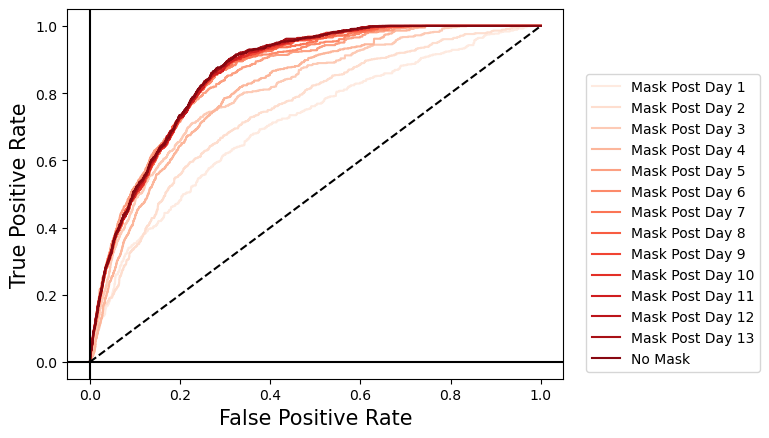

In [7]:
##############
## FIGURE 1 ##
##############
target = "MI"
fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)
        
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig('./figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

Original result reported from the paper is shown below.

![MI ROC with respect to post-day mask](Orig_MI_ROC.JPG)

* Analysis

The paper's conclusion can be reproduced by running the code. The reproduced results matches the original paper qualitively not quantitively.

For example, in the prediction result of MI. It is shown that the less data available (mask data from earlier days) the poorer the prediction. This conclusion can be found both in the original paper and the reproduced result. However, the curvature of the ROC curves are slightly different. The reproduced ROC is more effective than shown in the original paper, as it reaches higher true positive rate with smaller false positive rate.

Another example is the AUC value difference, in the paper it reports and AUC of 0.834 for MI prediction, in our reproduced result, it is 0.863.

* Plans:
    * Review the choices of hyperparameters from the original paper.
    * Experiment the model performance without attention mechanism (ablation study).
 